In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import zscore

In [17]:
#creating sample dataset
np.random.seed(42)
data=np.random.normal(loc=50,scale=10,size=100)  #mean=10,standard deviation=10
outliers=np.array([10,110,5,120])#outliers
data=np.concatenate([data,outliers])

In [18]:
#creating a DataFrame
df=pd.DataFrame(data,columns=['Values'])
print(df.head())

      Values
0  54.967142
1  48.617357
2  56.476885
3  65.230299
4  47.658466


In [19]:
print(df.tail())

         Values
99    47.654129
100   10.000000
101  110.000000
102    5.000000
103  120.000000


***Using scatter plot***

**<ins> A scatter plot helps visually identify extreme values.</ins>**

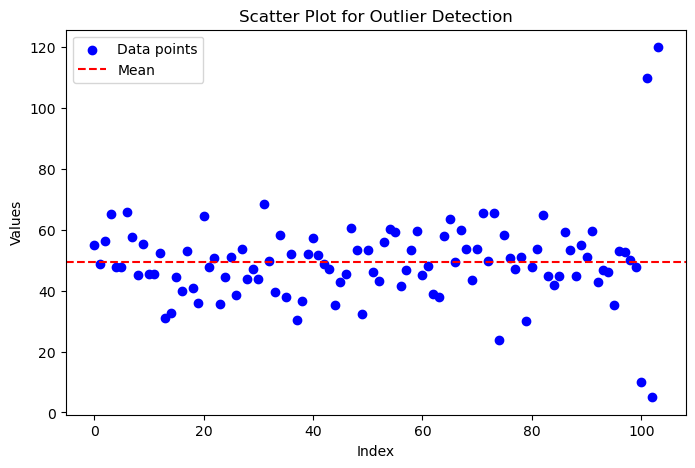

In [20]:
plt.figure(figsize=(8,5))
plt.scatter(range(len(df)),df['Values'],color='blue',label='Data points')
plt.axhline(y=df['Values'].mean(),color='red',linestyle='--',label='Mean')
plt.xlabel("Index")
plt.ylabel("Values")
plt.title("Scatter Plot for Outlier Detection")
plt.legend()
plt.show()

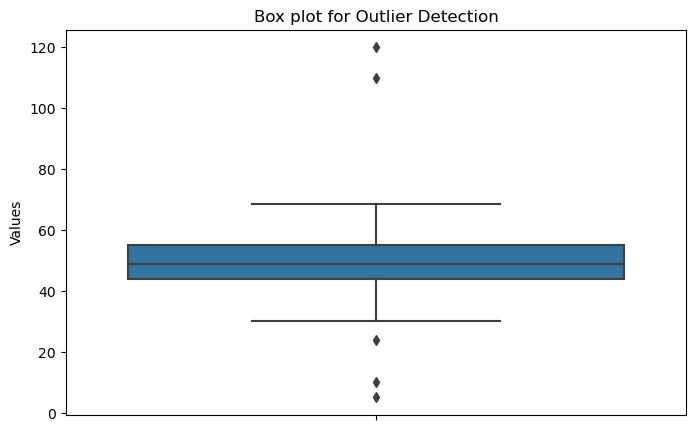

In [21]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df,y='Values')
plt.title("Box plot for Outlier Detection")
plt.show()

**Z-Score Method**

The Z-score formula is:

z=x-μ/σ 

where:

X=Data point

μ=Mean of the dataset

σ=Standard deviation of the dataset


Steps:

1.Compute the Z-score for each datapoint

2.If Z-score>3 and Z-score<-3, mark it as an outlier




In [23]:
df['Z-score']=zscore(df['Values'])
df['Outlier_Z']=df['Z-score'].apply(lambda x: 'Outlier' if abs(x)>3 else 'Normal')
print(df[df['Outlier_Z']=='Outlier'])

     Values   Z-score Outlier_Z
101   110.0  4.328173   Outlier
102     5.0 -3.175368   Outlier
103   120.0  5.042796   Outlier


**Interquartile Range(IQR) Method:**
    The IOR formuala is:
    
        IQR=Q3-Q1
        
   Steps:
   
   1.Calculate Q1(25th percentile) and Q3(75th Percentile)
   
   2.Compute IQR=Q3-Q1
   
   3.Define lower & upper bounds:
     
     **Lower Bound=Q1-1.5xIQR**
     
     **Upper Bound=Q3+1.5xIQR**
     
   4.Any value outside these bounds is an Outlier    

In [28]:
Q1=df['Values'].quantile(0.25)
Q3=df['Values'].quantile(0.75)
IQR=Q3-Q1
#defing bounds
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
#indentifying Outliers 
df['Outlier_IQR']=df['Values'].apply(lambda x:'Outlier' if(x<lower_bound or x>upper_bound) else 'Normal')
print(df[df['Outlier_IQR']=='Outlier'])

         Values   Z-score Outlier_Z Outlier_IQR
74    23.802549 -1.831694    Normal     Outlier
100   10.000000 -2.818056    Normal     Outlier
101  110.000000  4.328173   Outlier     Outlier
102    5.000000 -3.175368   Outlier     Outlier
103  120.000000  5.042796   Outlier     Outlier


**Finding Outliers Using the IQR Method with a 5-Number Summary**

The 5-number summary consists of:
 
Minimum (Q0) → The smallest value in the dataset.
 
First Quartile (Q1) → The 25th percentile (lower quartile).
 
Median (Q2) → The 50th percentile (middle value).
 
Third Quartile (Q3) → The 75th percentile (upper quartile).
 
Maximum (Q4) → The largest value in the dataset.
 
The Interquartile Range (IQR) is calculated as:
 
IQR=Q3−Q1
 
Any value outside the range:
 
[Q1−1.5×IQR,Q3+1.5×IQR]  is considered an outlier.
 
**Let's generate a dataset, compute the 5-number summary, and find the outliers using the IQR**
 

In [32]:
Q1=np.percentile(data,25)
Q2=np.median(data)
Q3=np.percentile(data,75)
min_value=np.min(data)
max_value=np.max(data)

IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

outliers=data[(data<lower_bound)|(data>upper_bound)]
              
print(f"5-Number summary :\n Min: {min_value}, Q1:{Q1}, Median(Q2):{Q2},Q3: {Q3}, Max:{max_value}")
print(f"IQR:{IQR}")
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
print(f"Outliers:{outliers}")

5-Number summary :
 Min: 5.0, Q1:43.874401021766715, Median(Q2):48.73043708220287,Q3: 55.00852473036764, Max:120.0
IQR:11.134123708600924
Lower Bound: 27.17321545886533, Upper Bound: 71.70971029326903
Outliers:[ 23.80254896  10.         110.           5.         120.        ]
